In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

In [2]:
df = pd.read_csv("Amazon_Sales_Records.csv")
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,05-28-2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,08-22-2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,06-20-2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
df.shape

(100, 14)

In [4]:
df.index

RangeIndex(start=0, stop=100, step=1)

In [5]:
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [6]:
# change data type of 'Order Date' to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [7]:
# change data type of 'Ship Date' to datetime
df["Ship Date"] = pd.to_datetime(df["Ship Date"],format="mixed")

In [8]:
df.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

In [9]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [10]:
# Let's make a copy of data frame
sales_data = df.copy()

In [11]:
# Creating Year, Month, Quarter, Day Columns from order date column 
sales_data['Order_Year'] = sales_data['Order Date'].dt.year
sales_data['Order_Month'] = sales_data['Order Date'].dt.month
sales_data['Order_Quarter'] = sales_data['Order Date'].dt.quarter
sales_data['Order_Day'] = sales_data['Order Date'].dt.day

In [12]:
sales_data.head(1)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order_Year,Order_Month,Order_Quarter,Order_Day
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.0,1582243.5,951410.5,2010,5,2,28


In [13]:
sales_data.describe(include='all')

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order_Year,Order_Month,Order_Quarter,Order_Day
count,100,100,100,100,100,100,1.000000e+02,100,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000
unique,7,76,12,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Sub-Saharan Africa,The Gambia,Clothes,Offline,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,36,4,13,50,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2013-09-16 14:09:36,5.550204e+08,2013-10-09 22:48:00,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05,2013.230000,6.260000,2.470000,16.500000
min,NaN,NaN,NaN,NaN,NaN,2010-02-02 00:00:00,1.146066e+08,2010-02-25 00:00:00,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03,2010.000000,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,2012-02-14 12:00:00,3.389225e+08,2012-02-24 18:00:00,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05,2012.000000,4.000000,2.000000,8.000000
50%,NaN,NaN,NaN,NaN,NaN,2013-07-12 12:00:00,5.577086e+08,2013-08-11 12:00:00,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05,2013.000000,6.000000,2.000000,17.000000
75%,NaN,NaN,NaN,NaN,NaN,2015-04-07 00:00:00,7.907551e+08,2015-04-28 00:00:00,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05,2015.000000,9.250000,3.250000,24.250000
max,NaN,NaN,NaN,NaN,NaN,2017-05-22 00:00:00,9.940222e+08,2017-06-17 00:00:00,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06,2017.000000,12.000000,4.000000,31.000000


### Let's perform EDA to gain insights

In [14]:
sales_data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit',
       'Order_Year', 'Order_Month', 'Order_Quarter', 'Order_Day'],
      dtype='object')

## Let's see sales trends 
### Year-wise Trends

<Axes: xlabel='Order_Year', ylabel='Units Sold'>

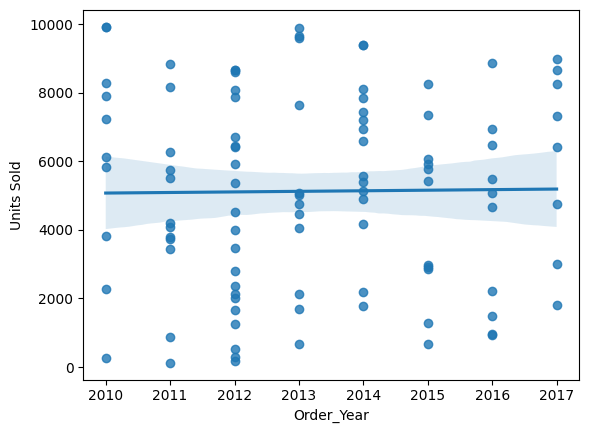

In [15]:


yearly_sales_trend = sns.regplot(data=sales_data, x='Order_Year', y='Units Sold')
yearly_sales_trend

In [16]:
sales_data[['Order_Year','Units Sold']].corr()

,Order_Year,Units Sold
Order_Year,1.000000,0.012455
Units Sold,0.012455,1.000000


##### Observation : 'year-wise sales trend'
There is no such trend or pattern and there is very less correlation that is 0.012

## Month-wise Trends

<Axes: xlabel='Order_Month', ylabel='Units Sold'>

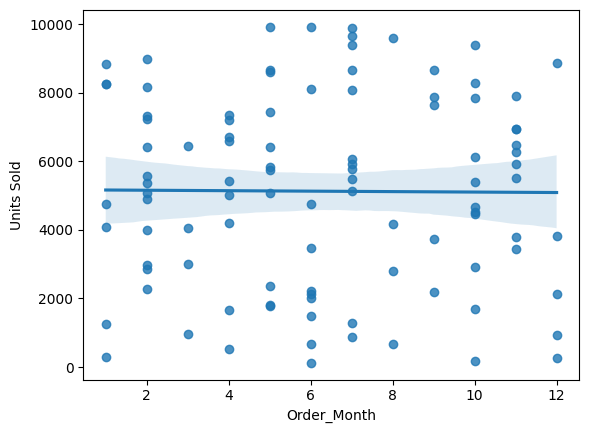

In [17]:
monthly_sales_trend = sns.regplot(data=sales_data, x='Order_Month', y='Units Sold')
monthly_sales_trend


In [18]:
sales_data[['Order_Month','Units Sold']].corr()

,Order_Month,Units Sold
Order_Month,1.000000,-0.007995
Units Sold,-0.007995,1.000000


##### Observation : 'month-wise sales trend'
There is no such trend or pattern and there is very less negative correlation that is -0.007995

<Axes: xlabel='Order_Day', ylabel='Units Sold'>

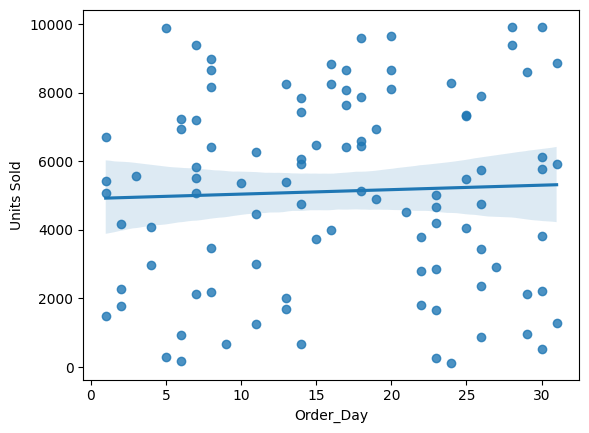

In [19]:
daily_sales_trend = sns.regplot(data=sales_data, x='Order_Day', y='Units Sold')
daily_sales_trend

In [20]:
sales_data[['Order_Day','Units Sold']].corr()

,Order_Day,Units Sold
Order_Day,1.000000,0.041945
Units Sold,0.041945,1.000000


##### Observation : 'day-wise sales trend'
There is no such trend or pattern and there is very less negative correlation that is 0.041945

In [21]:
# group by 'item type' and sum the 'units sold'

sales_data.groupby("Item Type")["Units Sold"].sum()

Item Type
Baby Food          40545
Beverages          56708
Cereal             25877
Clothes            71260
Cosmetics          83718
Fruits             49998
Household          44727
Meat               10675
Office Supplies    46967
Personal Care      48708
Snacks             13637
Vegetables         20051
Name: Units Sold, dtype: int64

In [22]:
# group by item type and sales channel and sum the units sold
df.groupby(["Item Type", "Sales Channel"])["Units Sold"].sum()

Item Type        Sales Channel
Baby Food        Offline          24098
                 Online           16447
Beverages        Offline          41588
                 Online           15120
Cereal           Offline           3761
                 Online           22116
Clothes          Offline          40871
                 Online           30389
Cosmetics        Offline          41749
                 Online           41969
Fruits           Offline          13904
                 Online           36094
Household        Offline          44445
                 Online             282
Meat             Online           10675
Office Supplies  Offline          20799
                 Online           26168
Personal Care    Offline          40350
                 Online            8358
Snacks           Online           13637
Vegetables       Offline           5217
                 Online           14834
Name: Units Sold, dtype: int64

### Lets's check data distribution

In [23]:
# Select only numerical columns
numerical_columns = sales_data.select_dtypes(include=['number'])
numerical_columns.head(1)

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order_Year,Order_Month,Order_Quarter,Order_Day
0,669165933,9925,255.28,159.42,2533654.0,1582243.5,951410.5,2010,5,2,28


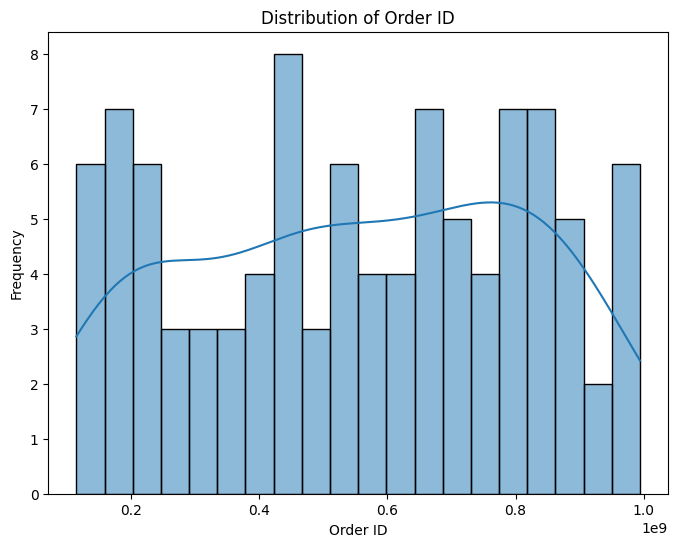

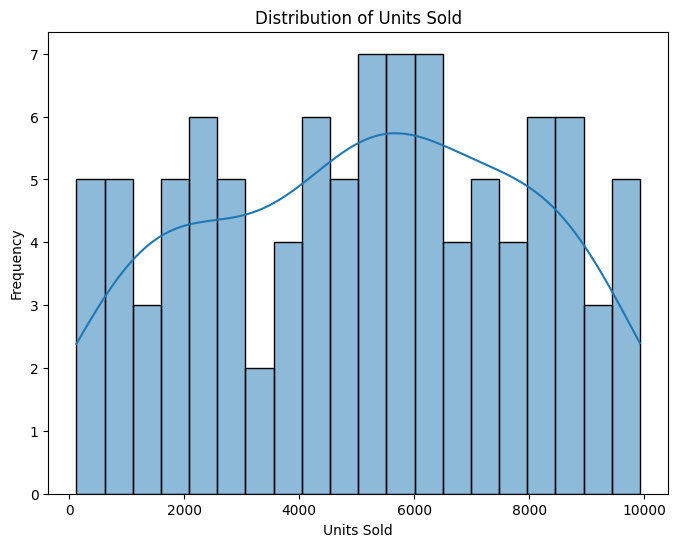

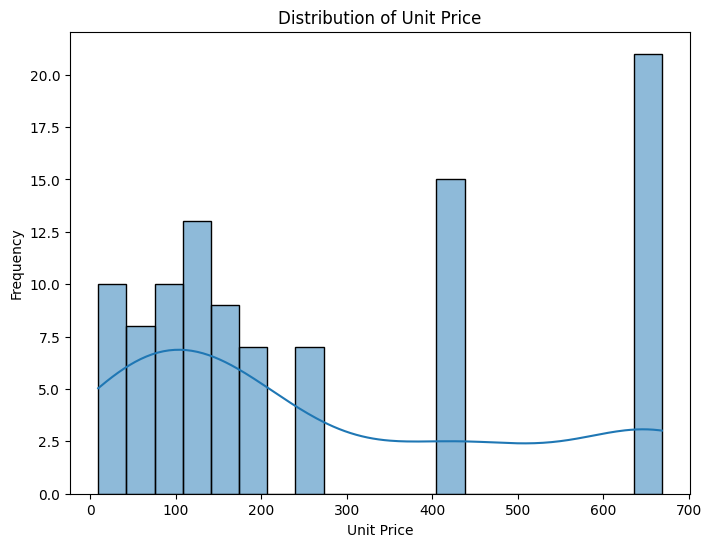

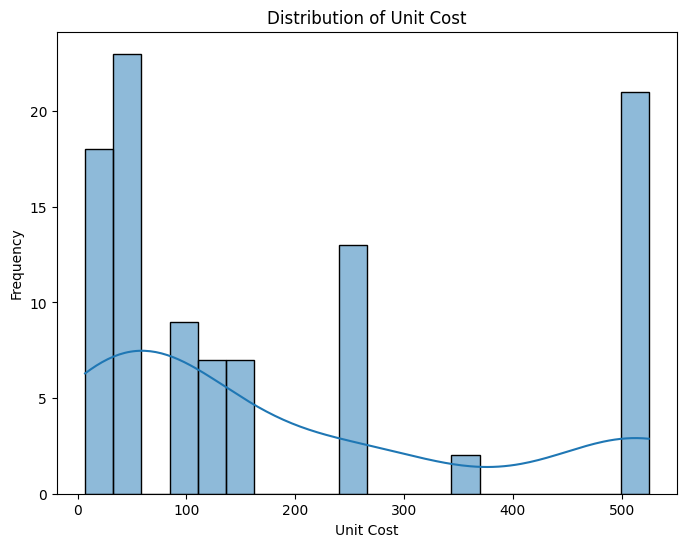

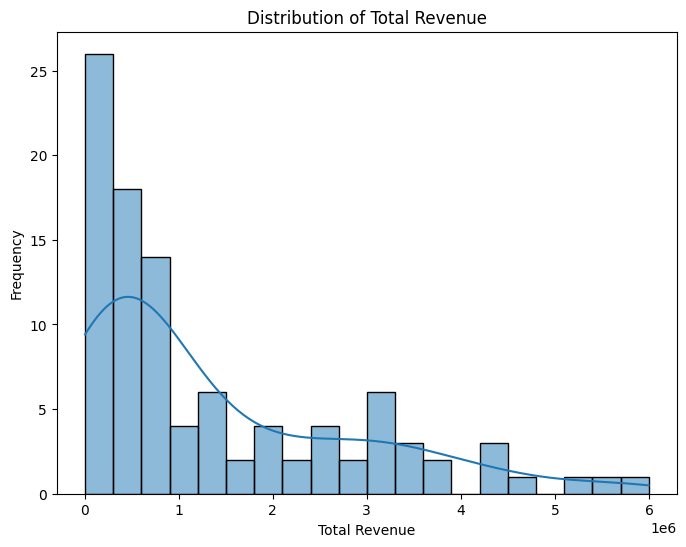

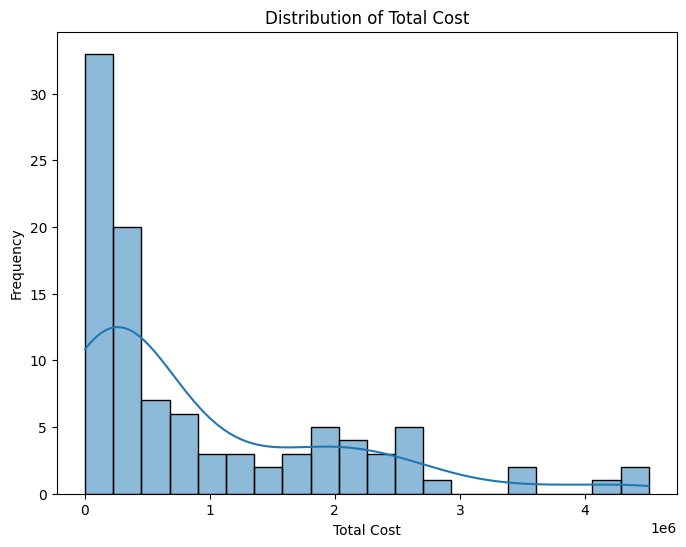

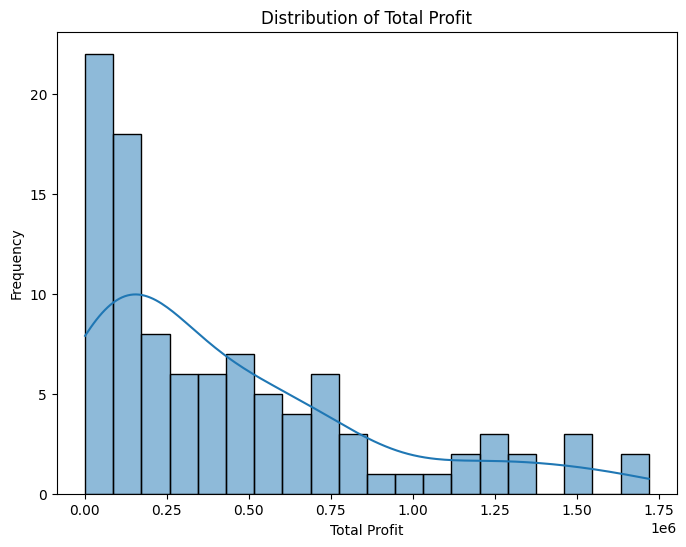

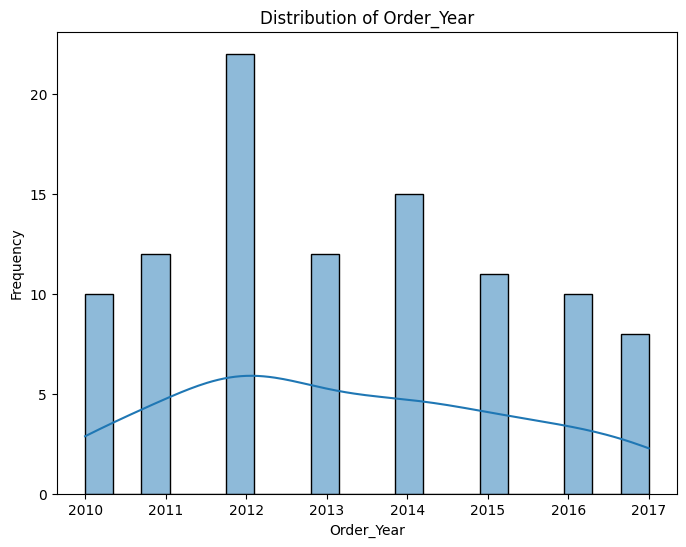

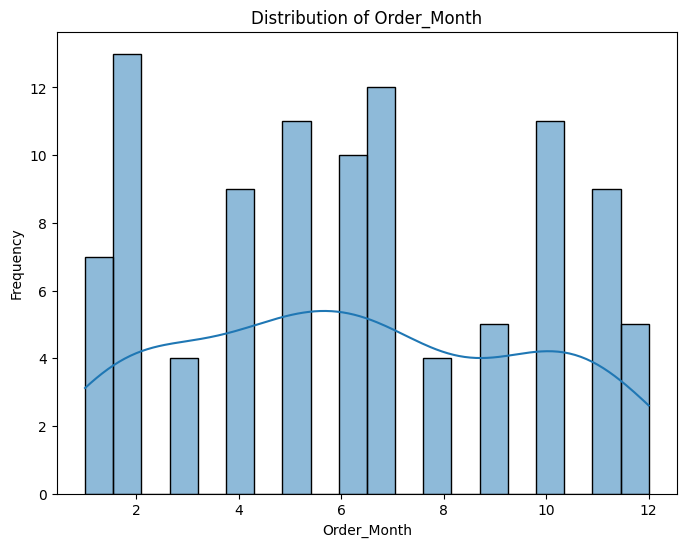

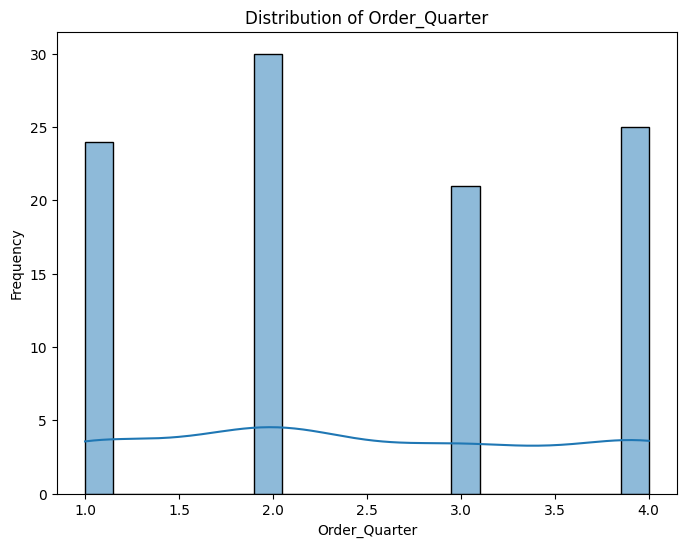

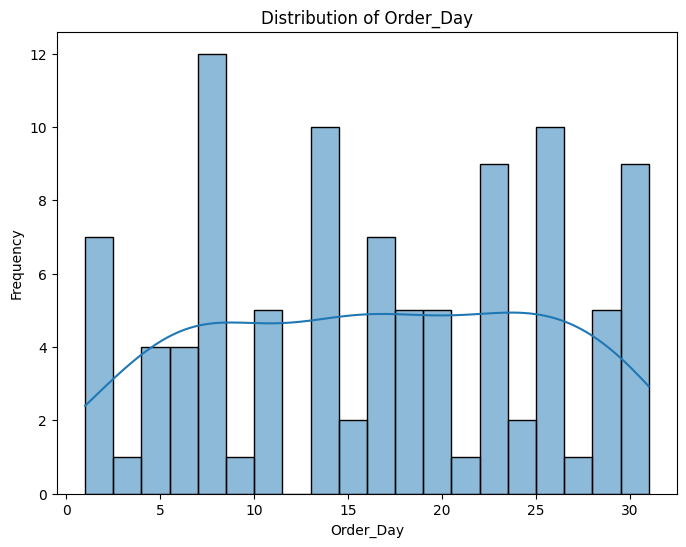

In [24]:
# Create histograms for all numerical columns
for column in numerical_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=sales_data, x=column, bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [25]:
# Select columns with outliers
columns_with_outliers = ['Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

# Function to detect and handle outliers using IQR
def handle_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Replace outliers with the median (you can choose a different method)
        median = df[column].median()
        df.loc[outliers.index, column] = median

# Detect and handle outliers
handle_outliers_iqr(sales_data, columns_with_outliers)

# saving the cleaned data to a new CSV file
sales_data.to_csv('sales_data_cleaned.csv', index=False)


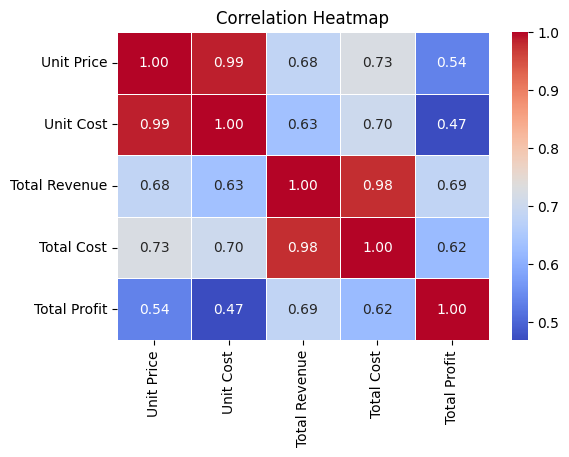

In [26]:
# Select relevant numerical columns
numeric_value_columns = ['Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

# Calculate correlation matrix
correlation_matrix = sales_data[numeric_value_columns].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [27]:
# Load the cleaned dataset
sales_data_cleaned = pd.read_csv('sales_data_cleaned.csv')
sales_data_cleaned.head(1)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order_Year,Order_Month,Order_Quarter,Order_Day
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.0,1582243.5,951410.5,2010,5,2,28


In [28]:
sales_data_cleaned.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
Order_Year          int64
Order_Month         int64
Order_Quarter       int64
Order_Day           int64
dtype: object

In [29]:
# Convert 'Order Date' column to datetime format
sales_data_cleaned['Order Date'] = pd.to_datetime(sales_data_cleaned['Order Date'])
sales_data_cleaned['Ship Date'] = pd.to_datetime(sales_data_cleaned['Ship Date'])


In [30]:
# Set 'Order Date' as the index for time series analysis
sales_data_cleaned.set_index('Order Date', inplace=True)

# Profitability Analysis

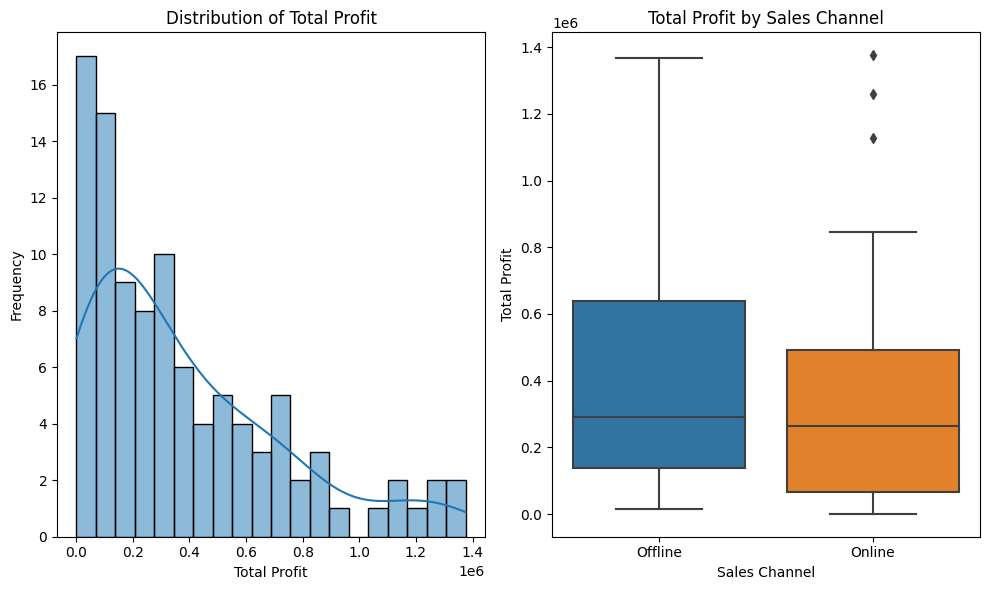

In [31]:
plt.figure(figsize=(10, 6))

# Distribution of Total Profit
plt.subplot(1, 2, 1)
sns.histplot(data=sales_data_cleaned, x='Total Profit', bins=20, kde=True)
plt.title('Distribution of Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Frequency')

# Boxplot of Total Profit by Sales Channel
plt.subplot(1, 2, 2)
sns.boxplot(data=sales_data_cleaned, x='Sales Channel', y='Total Profit')
plt.title('Total Profit by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Profit')

plt.tight_layout()
plt.show()

### Observation

1. The right-skewed distribution of 'Total Profit' indicates that, in general, the majority of transactions or sales events result in lower profits, while a smaller proportion of transactions contribute significantly to higher profits. This is a common pattern in business data
2. In online mode, there are some high sales points like outliers.

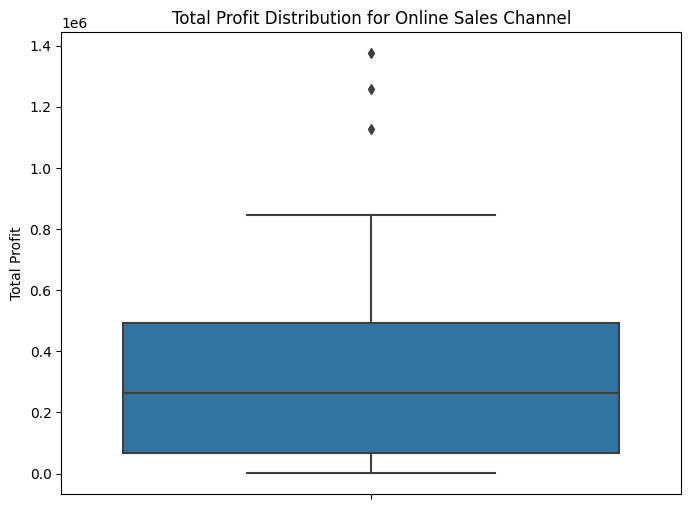

Extreme Outliers in 'Online' Sales Channel:
                                  Region     Country  Item Type Sales Channel  \
Order Date                                                                      
2010-02-06  Middle East and North Africa  Azerbaijan  Cosmetics        Online   
2016-11-15  Middle East and North Africa        Iran  Cosmetics        Online   
2010-11-26                        Europe     Romania  Cosmetics        Online   

           Order Priority   Order ID  Ship Date  Units Sold  Unit Price  \
Order Date                                                                
2010-02-06              M  382392299 2010-02-25        7234       437.2   
2016-11-15              H  286959302 2016-12-08        6489       437.2   
2010-11-26              H  660643374 2010-12-25        7910       437.2   

            Unit Cost  Total Revenue  Total Cost  Total Profit  Order_Year  \
Order Date                                                                   
2010-02-06     263

In [32]:
# Subset the data for the 'Online' sales channel

online_sales_data = sales_data_cleaned[sales_data_cleaned['Sales Channel'] == 'Online']

# Boxplot of Total Profit for the 'Online' sales channel
plt.figure(figsize=(8, 6))
sns.boxplot(data=online_sales_data, y='Total Profit')
plt.title('Total Profit Distribution for Online Sales Channel')
plt.ylabel('Total Profit')
plt.show()

# Identify and display extreme outliers
Q1 = online_sales_data['Total Profit'].quantile(0.25)
Q3 = online_sales_data['Total Profit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

extreme_outliers = online_sales_data[(online_sales_data['Total Profit'] < lower_bound) | (online_sales_data['Total Profit'] > upper_bound)]

print("Extreme Outliers in 'Online' Sales Channel:")
print(extreme_outliers)

### Observation :

In the analysis of the 'Online' sales channel, we identified extreme outliers in the 'Total Profit' column, indicating highly profitable and unprofitable transactions. Further investigation revealed that these outliers were influenced by various factors, including promotional campaigns, large one-time orders, and seasonal trends. To leverage these findings:

1. We plan to replicate successful strategies that led to high profitability in the future.
2. For unprofitable transactions, we will conduct a detailed review to understand the causes and take corrective actions.
3. Outliers will be treated separately in some analyses to gain a more accurate representation of typical performance.
4. We will implement monitoring mechanisms to detect similar outliers in the future, allowing for timely action.
5. These insights contribute to our ongoing efforts to optimize pricing strategies, marketing campaigns, and overall business performance

### Fearture Engineering :

##### Profit Margin

In [33]:
# Calculate Profit Margin (profit/revenue) as a percentage
sales_data_cleaned['Profit Margin (%)'] = (sales_data_cleaned['Total Profit'] / sales_data_cleaned['Total Revenue']) * 100


##### Sales Growth Rate

In [34]:
# Sort the DataFrame by 'Order Year' and 'Order Month' to ensure data is in chronological order
sales_data_cleaned.sort_values(by=['Order_Year', 'Order_Month'], inplace=True)

# Calculate Sales Growth Rate as the percentage change in total revenue compared to the previous month
sales_data_cleaned['Sales Growth Rate (%)'] = sales_data_cleaned['Total Revenue'].pct_change() * 100


##### Cost to revenue ratio

In [35]:
# Calculate Cost-to-Revenue Ratio as a percentage
sales_data_cleaned['Cost-to-Revenue Ratio (%)'] = (sales_data_cleaned['Total Cost'] / sales_data_cleaned['Total Revenue']) * 100


##### Let's analyse and visualize using the newly created features: 'Profit Margin,' 'Sales Growth Rate,' and 'Cost-to-Revenue Ratio.

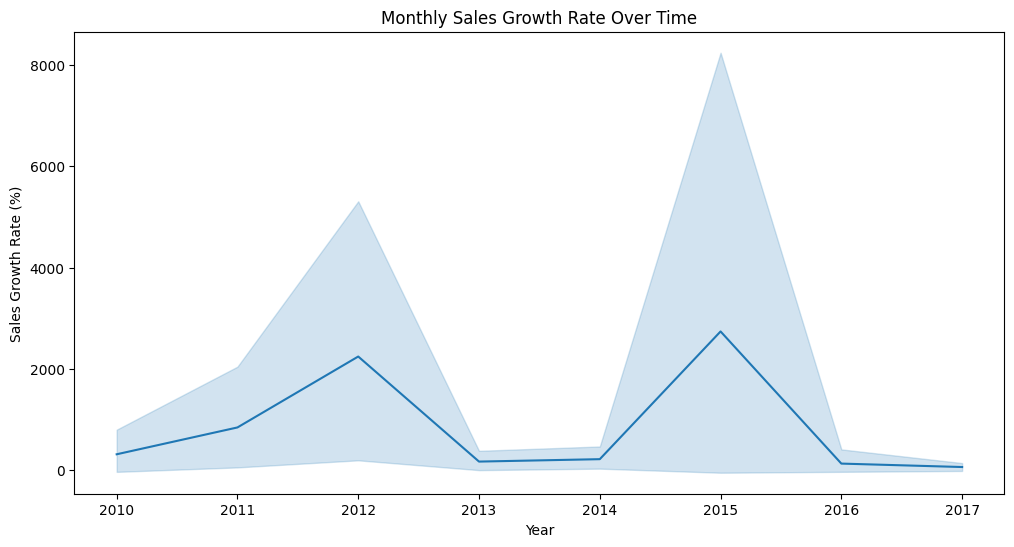

In [36]:
# Line plot of Sales Growth Rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_data_cleaned, x='Order_Year', y='Sales Growth Rate (%)')
plt.title('Monthly Sales Growth Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Sales Growth Rate (%)')
plt.show()

### Observation :

It's showing monthly sales growth rate over time. 
1. Here it's a patterns that sales growth increase in 2011 and same decrease in next year(2012-2013) and remains constant in 2013-2014 and after that patterns follows. Again sales increase for 1 year (2014-2015) and decrease next year in (2015-2016) and again remain constant for 1 year.
2. This pattern of sales increasing in one year and derceasing in next year can be accured due to some reason like promotion in that year or heavy discount or any other reason.

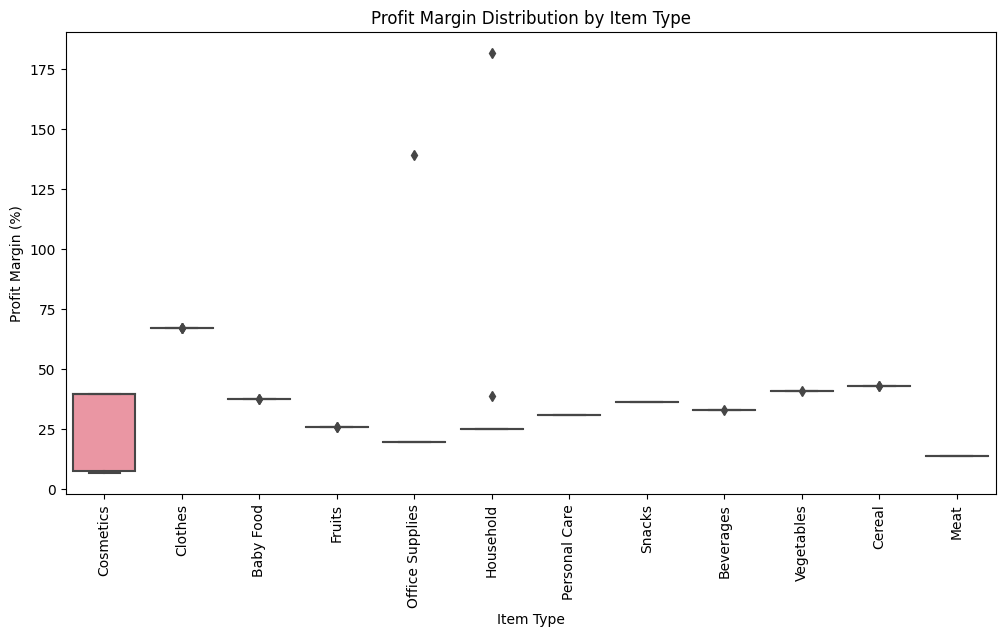

In [37]:
# Boxplot of Profit Margin by Item Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=sales_data_cleaned, x='Item Type', y='Profit Margin (%)')
plt.title('Profit Margin Distribution by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=90)
plt.show()

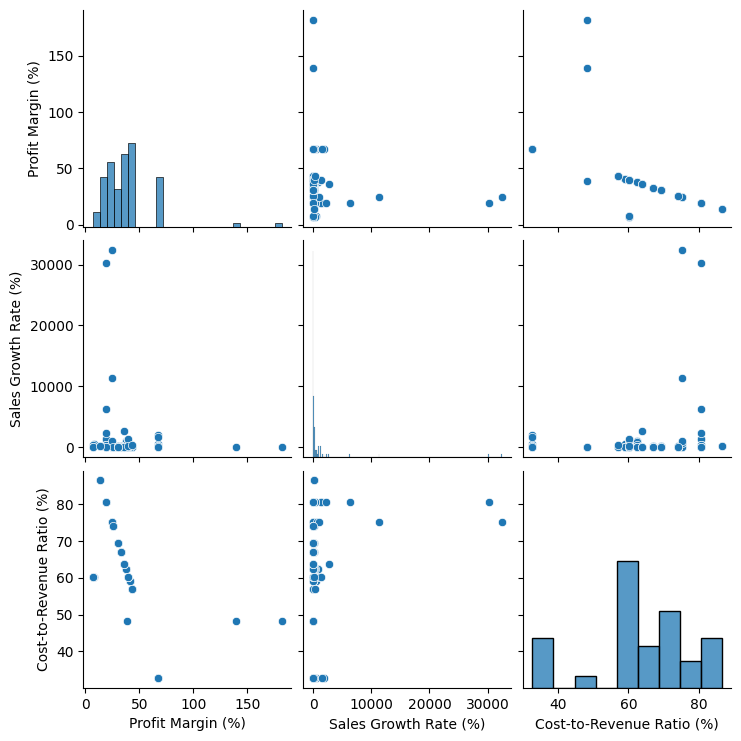

In [38]:
# Pairplot to explore relationships between features
sns.pairplot(sales_data_cleaned[['Profit Margin (%)', 'Sales Growth Rate (%)', 'Cost-to-Revenue Ratio (%)']])
plt.show()

### Month-Wise Analysis and Visualization:

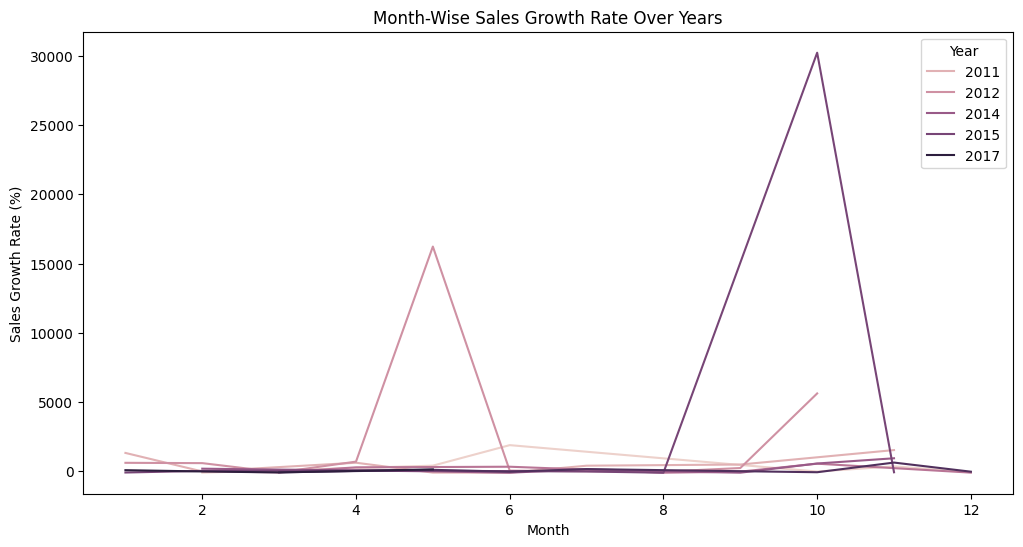

In [39]:
# Month-wise analysis

monthly_data = sales_data_cleaned.groupby(['Order_Year', 'Order_Month']).agg({
    'Sales Growth Rate (%)': 'mean',
    'Total Profit': 'sum'
}).reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x='Order_Month', y='Sales Growth Rate (%)', hue='Order_Year')
plt.title('Month-Wise Sales Growth Rate Over Years')
plt.xlabel('Month')
plt.ylabel('Sales Growth Rate (%)')
plt.legend(title='Year')
plt.show()


### Month-Wise Metrics:

In [40]:
sales_data_cleaned.head(1)

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order_Year,Order_Month,Order_Quarter,Order_Day,Profit Margin (%),Sales Growth Rate (%),Cost-to-Revenue Ratio (%)
Order Date,,,,,,,,,,,,,,,,,,,,
2010-02-06,Middle East and North Africa,Azerbaijan,Cosmetics,Online,M,382392299,2010-02-25,7234,437.2,263.33,3162704.8,1904929.22,1257775.58,2010,2,1,6,39.768984,NaN,60.231016


In [41]:
# Calculate key metrics
monthly_metrics = sales_data_cleaned.groupby('Order_Month').agg({
    'Sales Growth Rate (%)': 'mean',
    'Total Profit': 'mean',
    'Total Revenue': 'mean',
    'Total Cost': 'mean'
}).reset_index()

print("Month-Wise Key Metrics:")
print(monthly_metrics)

Month-Wise Key Metrics:
    Order_Month  Sales Growth Rate (%)   Total Profit  Total Revenue  \
0             1             568.387647  402408.145714   8.173649e+05   
1             2             177.216082  451965.960385   1.499675e+06   
2             3             -73.583276  232087.765000   5.687060e+05   
3             4             364.607194  528912.038889   1.798576e+06   
4             5            3066.418846  416608.390909   1.201431e+06   
5             6             247.471437  218537.943000   5.230326e+05   
6             7              93.773086  230128.002500   1.305793e+06   
7             8             -53.194250  144819.167500   2.820412e+05   
8             9             171.144542  225809.191000   1.062953e+06   
9            10            4017.850660  409720.295455   9.675740e+05   
10           11             961.090638  717511.183333   2.285358e+06   
11           12             -52.734636  221058.555000   1.449892e+06   

      Total Cost  
0   5.547459e+05  
1

### Year-Wise Analysis and Visualization:

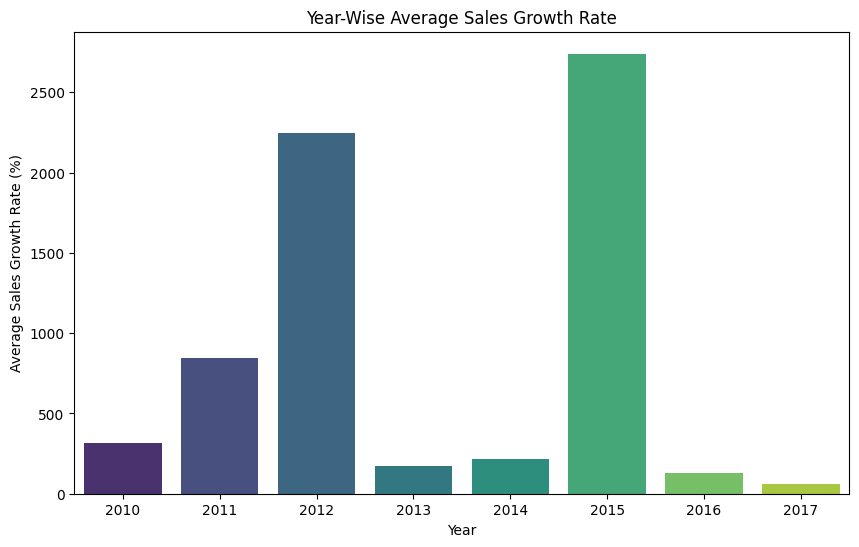

In [42]:
# Year-wise analysis

yearly_data = sales_data_cleaned.groupby(['Order_Year']).agg({
    'Sales Growth Rate (%)': 'mean',
    'Total Profit': 'sum'
}).reset_index()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_data, x='Order_Year', y='Sales Growth Rate (%)', palette='viridis')
plt.title('Year-Wise Average Sales Growth Rate')
plt.xlabel('Year')
plt.ylabel('Average Sales Growth Rate (%)')
plt.show()


### Observation :
1. Sales increases almost triple from 2010 to 2011.
2. Sales increases almost double from 2011 to 2012.
3. From year 2013 to 2017 growth remains almost uniform that is around 200
4. Year 2015 has the most growth rate > 2500

### Year-Wise Metrics:

In [43]:
# Year-wise analysis
yearly_data = sales_data_cleaned.groupby(['Order_Year']).agg({
    'Sales Growth Rate (%)': 'mean',
    'Total Profit': 'sum',
    'Total Revenue': 'sum',
    'Total Cost': 'sum'
}).reset_index()

print("Year-Wise Key Metrics:")
print(yearly_data)


Year-Wise Key Metrics:
   Order_Year  Sales Growth Rate (%)  Total Profit  Total Revenue  \
0        2010             314.818712   6629567.430    14541762.01   
1        2011             844.770731   2741008.230    11129166.07   
2        2012            2245.294080   7997890.045    31898644.52   
3        2013             170.598169   3898493.010    20330448.66   
4        2014             218.273033   5879461.680    16630214.43   
5        2015            2740.541763   3996539.440     7667069.72   
6        2016             130.916339   3652900.715    12372867.22   
7        2017              63.124893   2892860.425     8128679.01   

     Total Cost  
0  8.569680e+06  
1  8.388158e+06  
2  2.268563e+07  
3  1.361503e+07  
4  1.075075e+07  
5  4.649055e+06  
6  7.469029e+06  
7  5.137839e+06  


### Yearly-Month-Wise Analysis and Visualization:

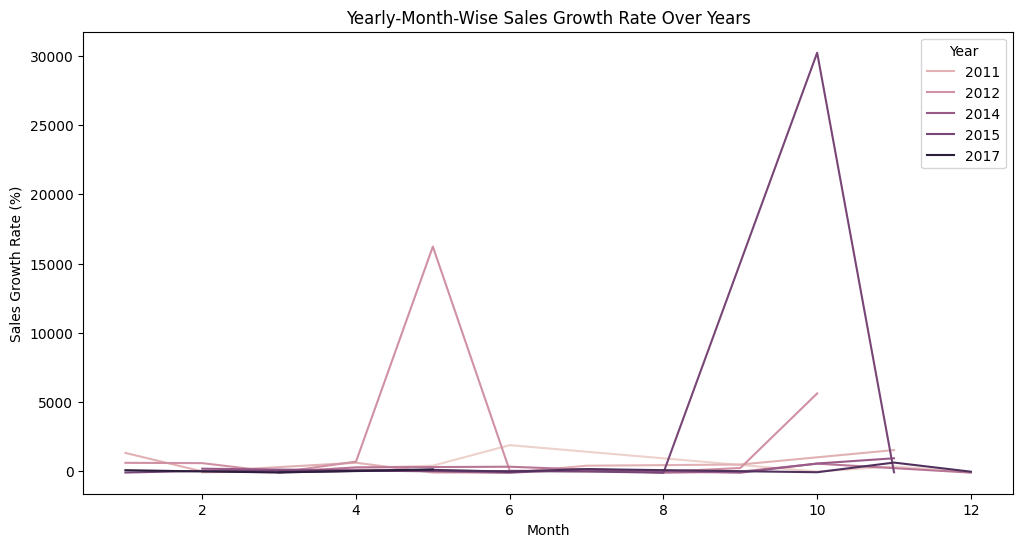

In [44]:
# Yearly-month-wise analysis
yearly_monthly_data = sales_data_cleaned.groupby(['Order_Year', 'Order_Month']).agg({
    'Sales Growth Rate (%)': 'mean',
    'Total Profit': 'sum'
}).reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_monthly_data, x='Order_Month', y='Sales Growth Rate (%)', hue='Order_Year')
plt.title('Yearly-Month-Wise Sales Growth Rate Over Years')
plt.xlabel('Month')
plt.ylabel('Sales Growth Rate (%)')
plt.legend(title='Year')
plt.show()


### Yearly-Month-Wise Metrics:

In [45]:
# Yearly-month-wise analysis
yearly_monthly_data = sales_data_cleaned.groupby(['Order_Year', 'Order_Month']).agg({
    'Sales Growth Rate (%)': 'mean',
    'Total Profit': 'sum',
    'Total Revenue': 'sum',
    'Total Cost': 'sum'
}).reset_index()

print("Yearly-Month-Wise Key Metrics:")
print(yearly_monthly_data)


Yearly-Month-Wise Key Metrics:
    Order_Year  Order_Month  Sales Growth Rate (%)  Total Profit  \
0         2010            2             -92.159992   1424410.940   
1         2010            5             411.979279    965441.520   
2         2010            6            1892.697250    727423.200   
3         2010           10             -12.845783   1495392.790   
4         2010           11             359.681775   1375311.700   
5         2010           12             -62.558808    641587.280   
6         2011            1            1330.346739    363509.040   
7         2011            2              -7.622607    127722.960   
8         2011            4             623.005319    693911.510   
9         2011            5             -90.264263     89904.060   
10        2011            6             -92.987259      7828.120   
11        2011            7             407.974689     65214.720   
12        2011            9             492.485705    235601.160   
13        2011   